## LSTM Model

In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [47]:
df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.1579 - val_loss: 0.0890
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0574 - val_loss: 0.0790
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0499 - val_loss: 0.0762
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0484 - val_loss: 0.0736
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0451 - val_loss: 0.0705
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0429 - val_loss: 0.0683
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0446 - val_loss: 0.0663
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0426 - val_loss: 0.0639
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0408 - val_loss: 0.0617
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0366 - val_loss: 0.0593
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0374 - val_loss: 0.0570
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0

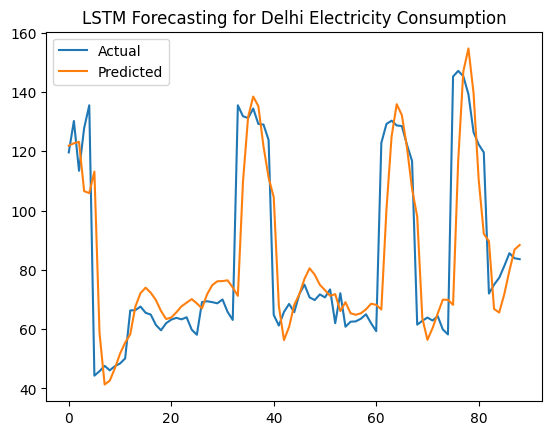

LSTM - RMSE: 18.14, MAE: 10.94, MAPE: 13.37%


In [97]:
region = 'Delhi'
region_data = df[region].values.reshape(-1, 1)


scaler = MinMaxScaler()
region_scaled = scaler.fit_transform(region_data)


def create_sequences(data, window=60):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(region_scaled)


split_idx = int(len(X) * 0.8)
X_train, y_train = X[:split_idx], y[:split_idx]
X_val, y_val = X[split_idx:], y[split_idx:]


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))


model = Sequential([
    LSTM(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


pred_scaled = model.predict(X_val)
pred = scaler.inverse_transform(pred_scaled)
true = scaler.inverse_transform(y_val)


plt.plot(true, label='Actual')
plt.plot(pred, label='Predicted')
plt.title(f'LSTM Forecasting for {region} Electricity Consumption')
plt.legend()
plt.show()


rmse = np.sqrt(mean_squared_error(true, pred))
mae = mean_absolute_error(true, pred)
mape = np.mean(np.abs((true - pred) / true)) * 100

print(f'LSTM - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Bi-LSTM Model

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.1474 - val_loss: 0.0903
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0541 - val_loss: 0.0782
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0510 - val_loss: 0.0714
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0447 - val_loss: 0.0683
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0429 - val_loss: 0.0655
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0450 - val_loss: 0.0621
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0379 - val_loss: 0.0593
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0332 - val_loss: 0.0557
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0326 - val_loss: 0.0528
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0329 - val_loss: 0.0482
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0300 - val_loss: 0.0443
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0250 - val_l

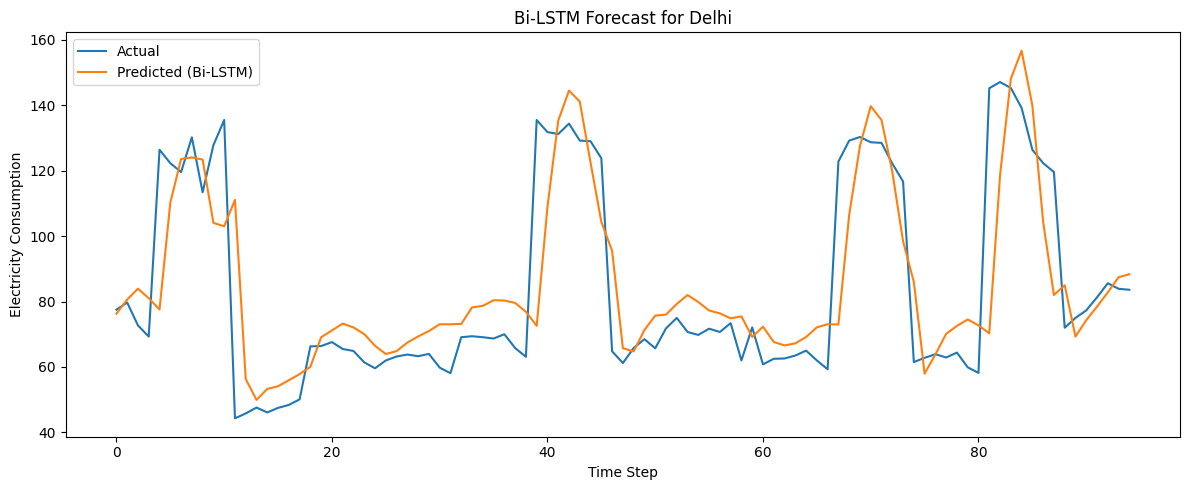

Bi-LSTM - RMSE: 18.30, MAE: 12.10, MAPE: 14.62%


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')

region = 'Delhi'
data = df[[region]].values


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, window=30)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]


model = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted (Bi-LSTM)')
plt.title(f'Bi-LSTM Forecast for {region}')
plt.xlabel('Time Step')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'Bi-LSTM - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## GRU Model

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.1470 - val_loss: 0.0674
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0435 - val_loss: 0.0635
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0398 - val_loss: 0.0576
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0331 - val_loss: 0.0534
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0347 - val_loss: 0.0505
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0325 - val_loss: 0.0477
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0320 - val_loss: 0.0449
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0278 - val_loss: 0.0421
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0278 - val_loss: 0.0396
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0258 - val_loss: 0.0373
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0268 - val_loss: 0.0354
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0224 - val_l

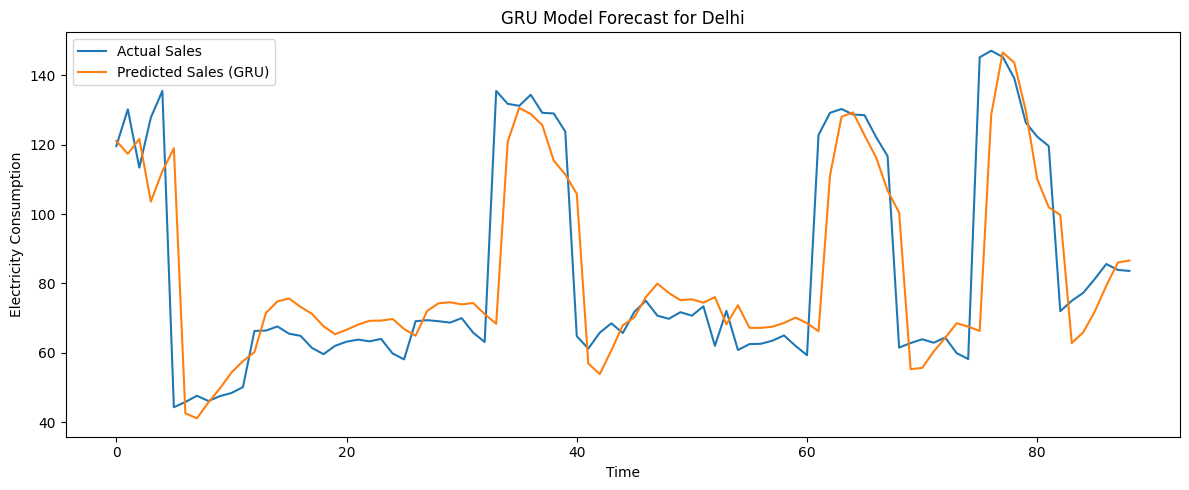

GRU - RMSE: 18.21, MAE: 10.82, MAPE: 13.67%


In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')


region = 'Delhi'
data = df[region].values.reshape(-1, 1)


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


def create_sequences(data, window=60):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]


X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))


model = Sequential([
    GRU(64, input_shape=(X.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales (GRU)')
plt.title(f'GRU Model Forecast for {region}')
plt.xlabel('Time')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'GRU - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Transformer Model

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1506 - val_loss: 0.0826
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0596 - val_loss: 0.0815
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0578 - val_loss: 0.0840
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0552 - val_loss: 0.0822
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0581 - val_loss: 0.0845
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0562 - val_loss: 0.0815
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0549 - val_loss: 0.0841
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0552 - val_loss: 0.0809
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0525 - val_loss: 0.0808
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0553 - val_loss: 0.0806
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0606 - val_loss: 0.0831
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0549 -

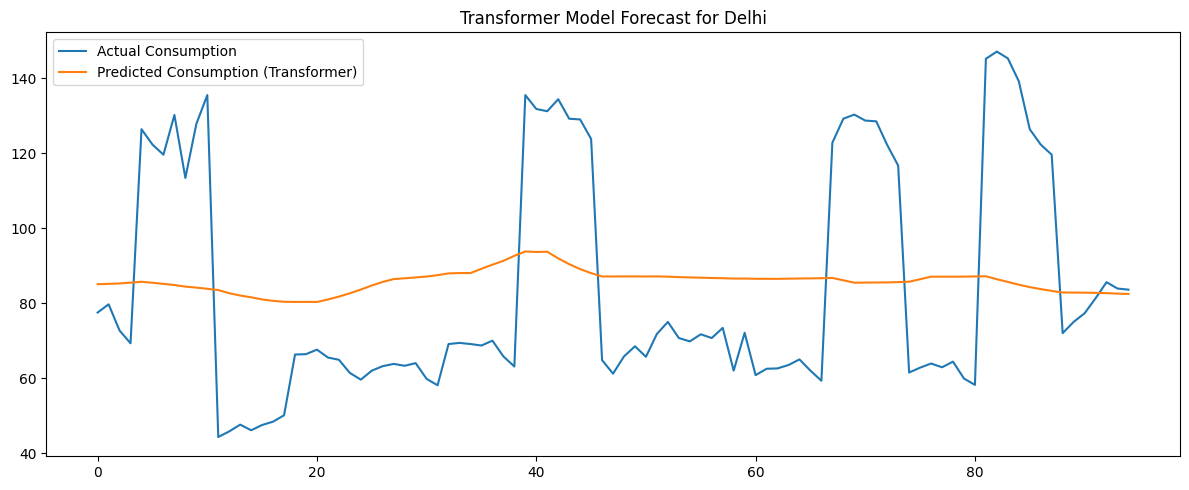

 Transformer - RMSE: 29.74, MAE: 26.71, MAPE: 33.09%


In [98]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')
region = 'Delhi'
data = df[region].values.reshape(-1, 1)


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, window=30)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]


class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        out1 = self.layernorm1(inputs + self.dropout1(attn_output, training=training))
        ffn_output = self.ffn(out1)
        return self.layernorm2(out1 + self.dropout2(ffn_output, training=training))


embed_dim = 32
num_heads = 2
ff_dim = 64

inputs = layers.Input(shape=(X.shape[1], 1))
x = layers.Dense(embed_dim)(inputs)
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(20, activation="relu")(x)
outputs = layers.Dense(1)(x)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer="adam", loss="mse")


model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Consumption')
plt.plot(y_pred, label='Predicted Consumption (Transformer)')
plt.title(f'Transformer Model Forecast for {region}')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f' Transformer - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## TCN Model

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 4.4587 - val_loss: 0.6220
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4889 - val_loss: 0.3152
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1888 - val_loss: 0.1560
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0651 - val_loss: 0.0652
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0343 - val_loss: 0.0493
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0251 - val_loss: 0.0451
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0234 - val_loss: 0.0392
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0222 - val_loss: 0.0355
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0176 - val_loss: 0.0330
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0152 - val_loss: 0.0310
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0134 - val_loss: 0.0296
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0120 - val_l

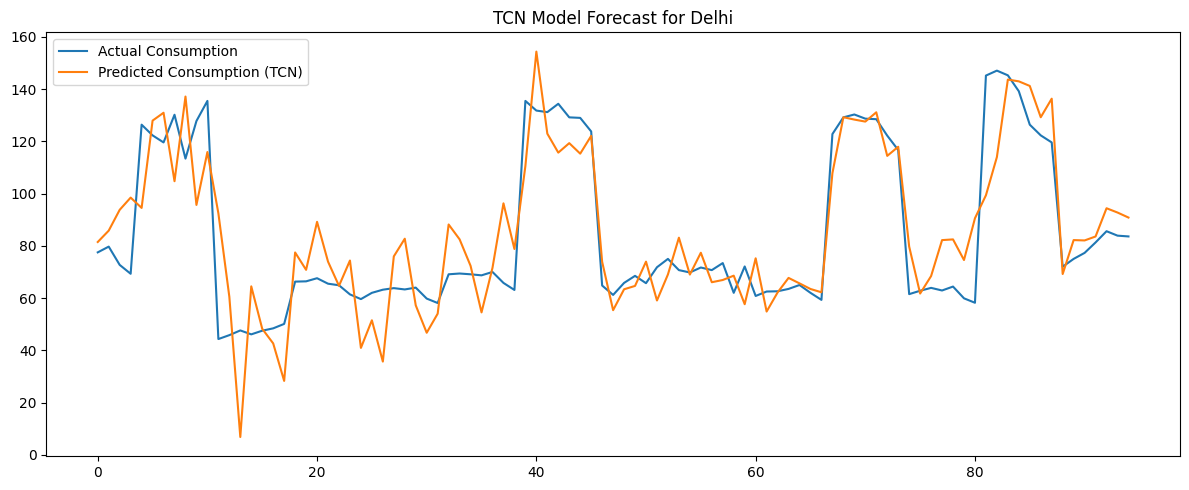

TCN - RMSE: 16.11, MAE: 12.24, MAPE: 16.38%


In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN

df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')


region = 'Delhi'
data = df[region].values.reshape(-1, 1)


scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)


def create_sequences(data, window=30):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i + window])
        y.append(data[i + window])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled)


split = int(len(X) * 0.8)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]


model = Sequential()
model.add(TCN(input_shape=(X.shape[1], 1)))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


y_pred_scaled = model.predict(X_val)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_val)


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Consumption')
plt.plot(y_pred, label='Predicted Consumption (TCN)')
plt.title(f'TCN Model Forecast for {region}')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'TCN - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')



## N-Beats Model

| N-Beats
| --  Stack Trend (#0) (share_weights_in_stack=False)
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @14752968496
     | -- TrendBlock(units=128, thetas_dim=4, backcast_length=30, forecast_length=1, share_thetas=True) at @14742995360
| --  Stack Seasonality (#1) (share_weights_in_stack=False)
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @15079642256
     | -- SeasonalityBlock(units=128, thetas_dim=1, backcast_length=30, forecast_length=1, share_thetas=True) at @15083239280
Epoch 1, Loss: 0.1006
Epoch 2, Loss: 0.0657
Epoch 3, Loss: 0.0582
Epoch 4, Loss: 0.0578
Epoch 5, Loss: 0.0571
Epoch 6, Loss: 0.0563


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([52, 1, 1])) that is different to the input size (torch.Size([52, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 7, Loss: 0.0564
Epoch 8, Loss: 0.0561
Epoch 9, Loss: 0.0564
Epoch 10, Loss: 0.0559
Epoch 11, Loss: 0.0563
Epoch 12, Loss: 0.0562
Epoch 13, Loss: 0.0568
Epoch 14, Loss: 0.0563
Epoch 15, Loss: 0.0576
Epoch 16, Loss: 0.0564
Epoch 17, Loss: 0.0573
Epoch 18, Loss: 0.0564
Epoch 19, Loss: 0.0568
Epoch 20, Loss: 0.0561
Epoch 21, Loss: 0.0565
Epoch 22, Loss: 0.0573
Epoch 23, Loss: 0.0562
Epoch 24, Loss: 0.0562
Epoch 25, Loss: 0.0561
Epoch 26, Loss: 0.0561
Epoch 27, Loss: 0.0559
Epoch 28, Loss: 0.0563
Epoch 29, Loss: 0.0564
Epoch 30, Loss: 0.0563
Epoch 31, Loss: 0.0566
Epoch 32, Loss: 0.0565
Epoch 33, Loss: 0.0561
Epoch 34, Loss: 0.0577
Epoch 35, Loss: 0.0564
Epoch 36, Loss: 0.0568
Epoch 37, Loss: 0.0562
Epoch 38, Loss: 0.0562
Epoch 39, Loss: 0.0556
Epoch 40, Loss: 0.0568
Epoch 41, Loss: 0.0560
Epoch 42, Loss: 0.0565
Epoch 43, Loss: 0.0565
Epoch 44, Loss: 0.0563
Epoch 45, Loss: 0.0563
Epoch 46, Loss: 0.0556
Epoch 47, Loss: 0.0562
Epoch 48, Loss: 0.0567
Epoch 49, Loss: 0.0571
Epoch 50, Loss

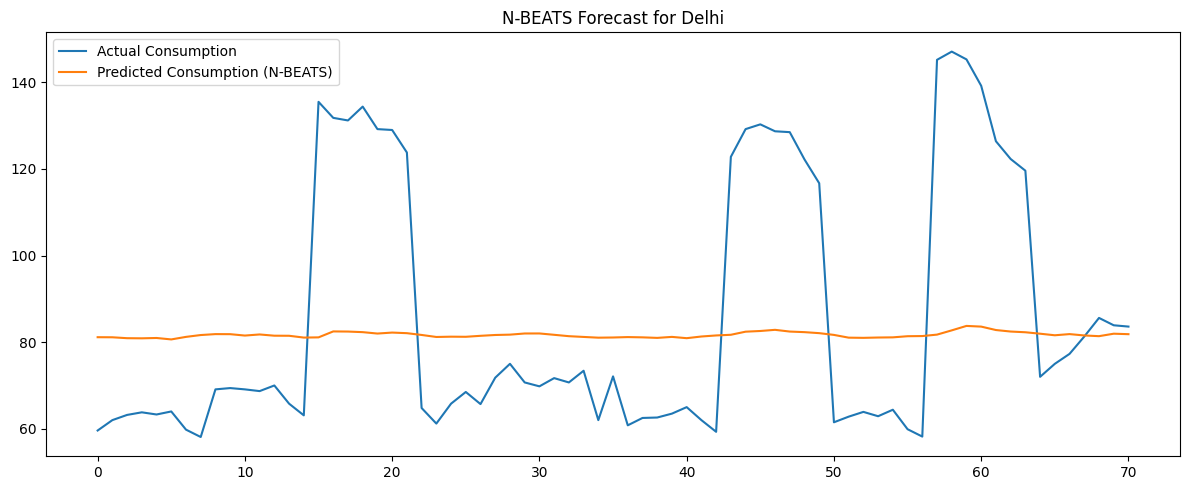

N-BEATS - RMSE: 29.54, MAE: 24.41, MAPE: 26.72%


In [71]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from nbeats_pytorch.model import NBeatsNet


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')
region = 'Delhi'
data = df[region].values.reshape(-1, 1)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

WINDOW = 30
HORIZON = 1
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window, horizon):
        self.X, self.y = [], []
        for i in range(len(data) - window - horizon + 1):
            self.X.append(data[i:i + window])
            self.y.append(data[i + window:i + window + horizon])
        self.X = np.array(self.X)
        self.y = np.array(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return torch.tensor(self.X[idx], dtype=torch.float32), torch.tensor(self.y[idx], dtype=torch.float32)


split = int(len(data_scaled) * 0.8)
train_dataset = TimeSeriesDataset(data_scaled[:split], WINDOW, HORIZON)
val_dataset = TimeSeriesDataset(data_scaled[split:], WINDOW, HORIZON)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NBeatsNet(
    stack_types=('trend', 'seasonality'),
    nb_blocks_per_stack=2,
    forecast_length=HORIZON,
    backcast_length=WINDOW,
    thetas_dim=(4, 8),
    hidden_layer_units=128
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()


EPOCHS = 50
for epoch in range(EPOCHS):
    model.train()
    train_losses = []
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        backcast, forecast = model(X_batch)
        loss = loss_fn(forecast, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    print(f"Epoch {epoch+1}, Loss: {np.mean(train_losses):.4f}")


model.eval()
predictions, actuals = [], []

with torch.no_grad():
    for X_batch, y_batch in val_loader:
        X_batch = X_batch.to(device)
        _, forecast = model(X_batch)
        predictions.extend(forecast.cpu().numpy())
        actuals.extend(y_batch.numpy())


y_pred = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
y_true = scaler.inverse_transform(np.array(actuals).reshape(-1, 1))


plt.figure(figsize=(12, 5))
plt.plot(y_true, label='Actual Consumption')
plt.plot(y_pred, label='Predicted Consumption (N-BEATS)')
plt.title(f'N-BEATS Forecast for {region}')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f'N-BEATS - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## ARIMA Model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWar

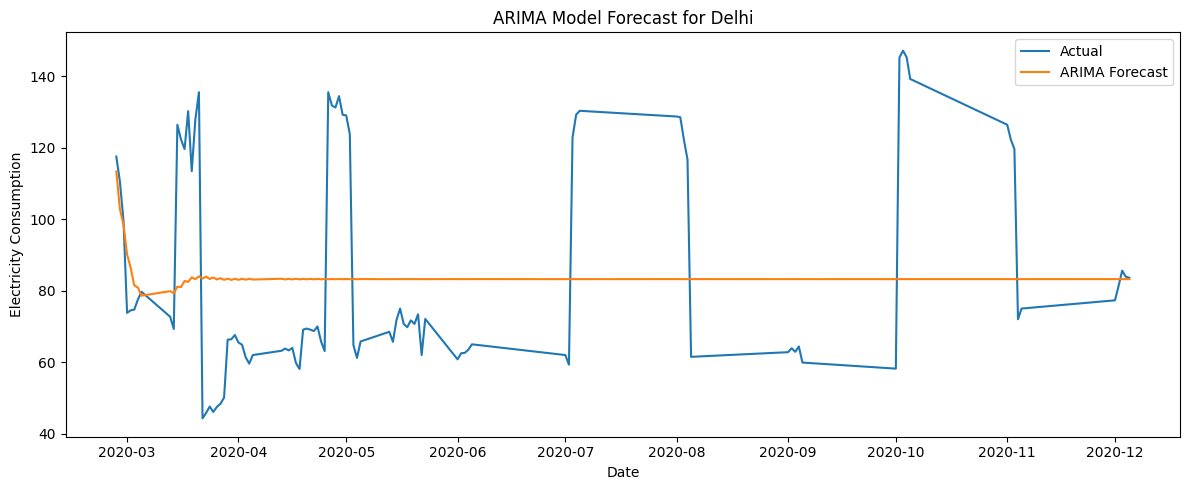

ARIMA - RMSE: 29.53, MAE: 25.02, MAPE: 30.13%


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')
region = 'Delhi'
data = df.set_index('date')[region]


train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]


model = ARIMA(train, order=(5, 1, 2))  # 可根据 AIC/BIC 微调参数
model_fit = model.fit()


forecast = model_fit.forecast(steps=len(test))


plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast.values, label='ARIMA Forecast')
plt.title(f'ARIMA Model Forecast for {region}')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.tight_layout()
plt.show()


rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test.values - forecast.values) / test.values)) * 100

print(f'ARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## SARIMA Model

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported

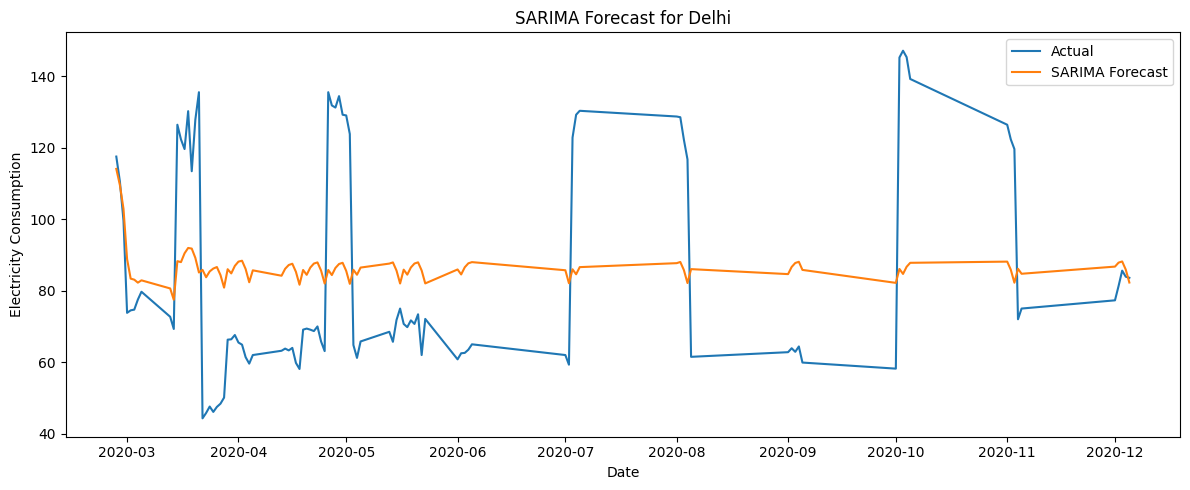

SARIMA - RMSE: 29.02, MAE: 25.43, MAPE: nan%


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('../data/dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')

region = 'Delhi'
df = df[['date', region]].rename(columns={region: 'value'})
df.set_index('date', inplace=True)

train_size = int(len(df) * 0.8)
train, test = df['value'][:train_size], df['value'][train_size:]
# Fit SARIMA model
model = SARIMAX(train,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 7),
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100

# Plot results
plt.figure(figsize=(12, 5))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, forecast.values, label='SARIMA Forecast')
plt.title(f'SARIMA Forecast for {region}')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.tight_layout()
plt.show()

print(f'SARIMA - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Prophet Model

02:04:19 - cmdstanpy - INFO - Chain [1] start processing
02:04:19 - cmdstanpy - INFO - Chain [1] done processing


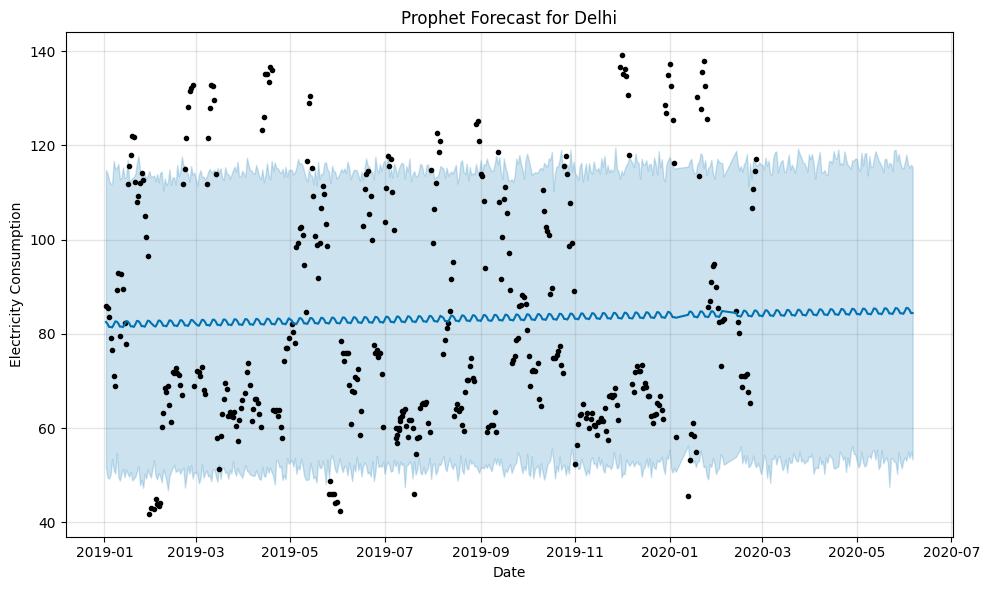

Prophet - RMSE: 29.73, MAE: 26.10, MAPE: 32.99%


In [102]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')

region = 'Delhi'
df_prophet = df[['date', region]].rename(columns={'date': 'ds', region: 'y'})


train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]


model = Prophet()
model.fit(train_df)


future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)


model.plot(forecast)
plt.title(f'Prophet Forecast for {region}')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption')
plt.tight_layout()
plt.show()


pred = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test_df):]
actual = test_df.set_index('ds')

rmse = np.sqrt(mean_squared_error(actual['y'], pred['yhat']))
mae = mean_absolute_error(actual['y'], pred['yhat'])
mape = np.mean(np.abs((actual['y'] - pred['yhat']) / actual['y'])) * 100

print(f'Prophet - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## XGBoost Model

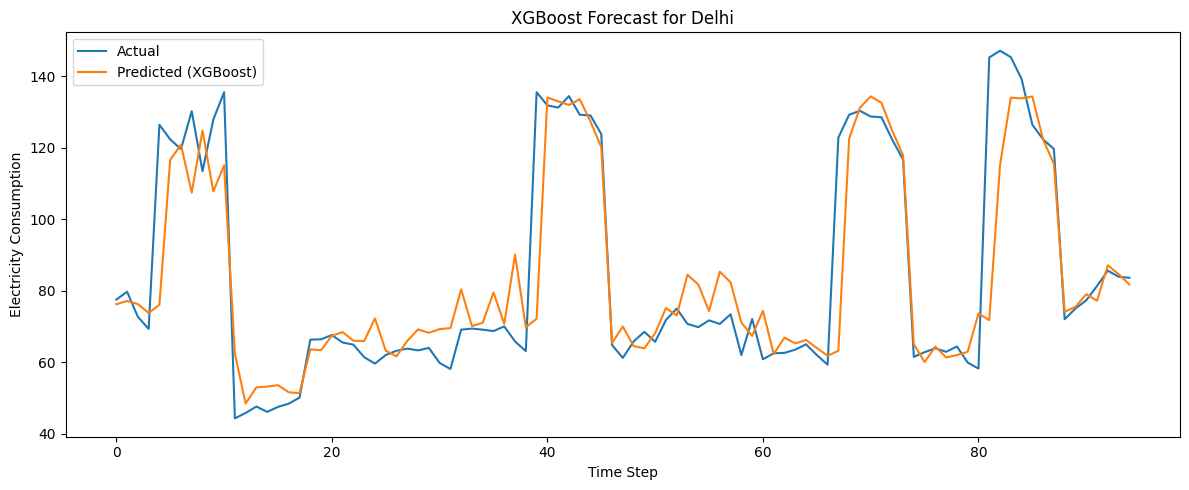

XGBoost - RMSE: 15.10, MAE: 7.97, MAPE: 9.00%


In [96]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


df = pd.read_csv('dataset_tk.csv')
df['date'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
df = df.sort_values('date')

region = 'Delhi'
data = df[['date', region]].rename(columns={region: 'value'})
data.set_index('date', inplace=True)


def create_lag_features(series, window=30):
    df_lagged = pd.DataFrame()
    for i in range(window):
        df_lagged[f'lag_{i+1}'] = series.shift(i + 1)
    df_lagged['target'] = series.values
    df_lagged.dropna(inplace=True)
    return df_lagged

lagged_data = create_lag_features(data['value'], window=30)

X = lagged_data.drop(columns='target')
y = lagged_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted (XGBoost)')
plt.title(f'XGBoost Forecast for {region}')
plt.xlabel('Time Step')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.tight_layout()
plt.show()


print(f'XGBoost - RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%')


## Deep Learning Model

#### LSTM - RMSE: 18.14, MAE: 10.94, MAPE: 13.37%
#### Bi-LSTM - RMSE: 18.30, MAE: 12.10, MAPE: 14.62%
#### GRU - RMSE: 18.21, MAE: 10.82, MAPE: 13.67%
#### Transformer - RMSE: 29.74, MAE: 26.71, MAPE: 33.09%
#### N-BEATS - RMSE: 29.54, MAE: 24.41, MAPE: 26.72%
#### TCN - RMSE: 16.11, MAE: 12.24, MAPE: 16.38%

## Classical Model

#### ARIMA - RMSE: 29.53, MAE: 25.02, MAPE: 30.13%
#### SARIMA - RMSE: 29.02, MAE: 25.43, MAPE: nan%
#### Prophet - RMSE: 29.73, MAE: 26.10, MAPE: 32.99%
#### XGBoost - RMSE: 15.10, MAE: 7.97, MAPE: 9.00%